# Looking at spread of NEID RVs and error

In [333]:
import os
import numpy as np
import pandas as pd
import tamar.tools.plotting_funcs as plot
import matplotlib.pyplot as plt
from tamar.tools.settings import CsvDir

In [334]:
# csv file with rv components
csv_file = os.path.join(CsvDir.NEID_CALC, 'txt_rvs.csv')
neid_data = os.path.join(CsvDir.NEID_CALC, 'neid_rvs_txt_file.csv')

In [335]:
# create pandas dataframe
component_df = pd.read_csv(neid_data)

dates = component_df.date_jd.values
rv_sun = component_df.rv_sun.values * 1000
rv_error = component_df.rv_error.values * 1000

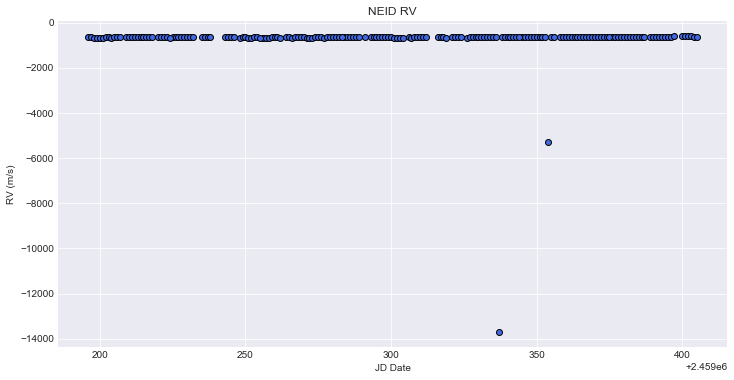

In [336]:
x = dates
y = rv_sun
title = 'NEID RV'
xlabel = 'JD Date'
ylabel = 'RV (m/s)'

plot.plot_timeseries(x, y, title, xlabel, ylabel)

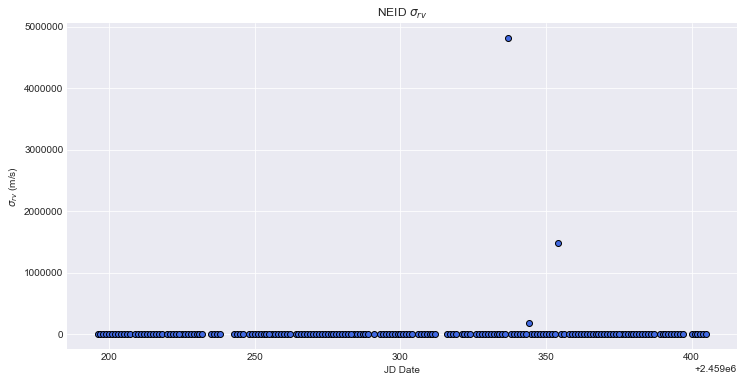

In [337]:
x = dates
y = rv_error
title = 'NEID $\sigma_{rv}$'
xlabel = 'JD Date'
ylabel = '$\sigma_{rv}$ (m/s)'

plot.plot_timeseries(x, y, title, xlabel, ylabel)

Remove outliers

In [338]:
initial_outliers = np.logical_or(np.abs(rv_sun) > 1000, np.abs(rv_error) > 1)
dates = dates[~initial_outliers]
rv_sun = rv_sun[~initial_outliers]
rv_error = rv_error[~initial_outliers]

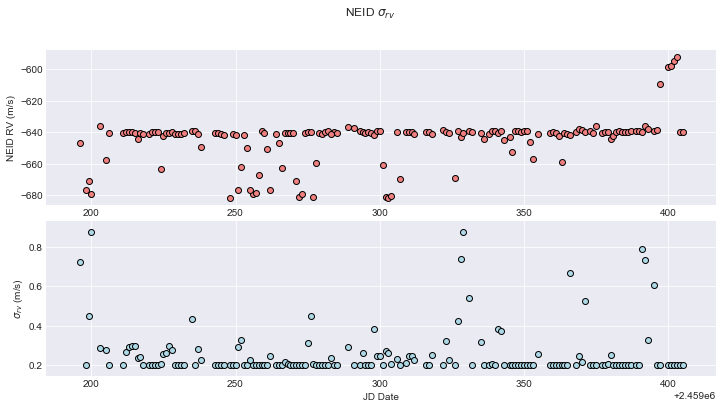

In [339]:
x = dates
y_list = [rv_sun, rv_error]
xlabel = 'JD Date'
ylabel_list = ['NEID RV (m/s)', '$\sigma_{rv}$ (m/s)']
ylabel_list = ['NEID RV (m/s)', '$\sigma_{rv}$ (m/s)']

plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

Find standard deviations of both

In [340]:
sun_std = np.std(rv_sun)
error_std = np.std(rv_error)

print('NEID RV Std:', sun_std)
print('Error Std:', error_std)

NEID RV Std: 14.777902791207318
Error Std: 0.12946569482692646


Get outliers outside $3\sigma$.

In [341]:
sun_bound = 3 * sun_std
error_bound = 3 * error_std

print('NEID RV Std Bound:', sun_bound)
print('Error Std Bound:', error_bound)

NEID RV Std Bound: 44.33370837362195
Error Std Bound: 0.38839708448077936


Plot some histograms of this.

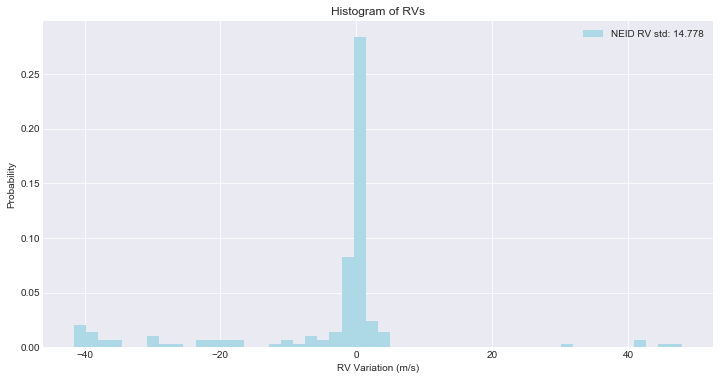

In [342]:
sun_hist = rv_sun - np.median (rv_sun)
plt.hist(sun_hist, color='lightblue', label='NEID RV std: ' + str(np.round(sun_std, 3)), density=True, bins=50)
plt.title('Histogram of RVs')
plt.xlabel('RV Variation (m/s)')
plt.ylabel('Probability')
plt.legend()
plt.show()


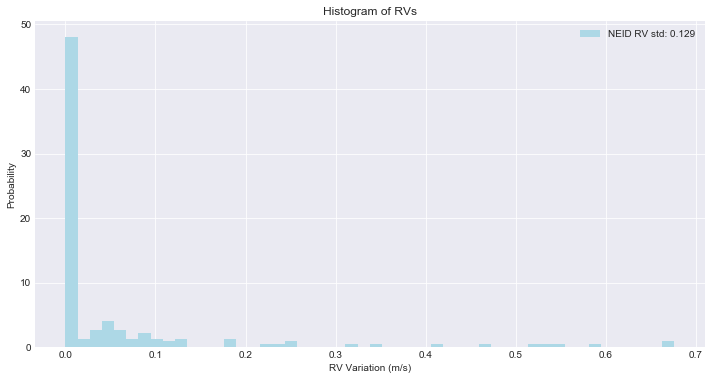

In [343]:
error_hist = rv_error - np.median(rv_error)
plt.hist(error_hist, color='lightblue', label='NEID RV std: ' + str(np.round(error_std, 3)), density=True, bins=50)
plt.title('Histogram of RVs')
plt.xlabel('RV Variation (m/s)')
plt.ylabel('Probability')
plt.legend()
plt.show()

Remove outliers above bounds.


In [344]:
med_sun = np.abs(np.median(rv_sun))
med_error = np.abs(np.median(rv_error))
initial_out_sun = np.logical_and(med_sun + sun_bound > np.abs(rv_sun), np.abs(rv_sun) > med_sun - sun_bound)
initial_out_error = np.logical_and(med_error + error_bound > np.abs(rv_error), np.abs(rv_error) > med_error - error_bound)
initial_outliers = np.logical_and(initial_out_sun, initial_out_error)
dates = dates[initial_outliers]
rv_sun = rv_sun[initial_outliers]
rv_error = rv_error[initial_outliers]

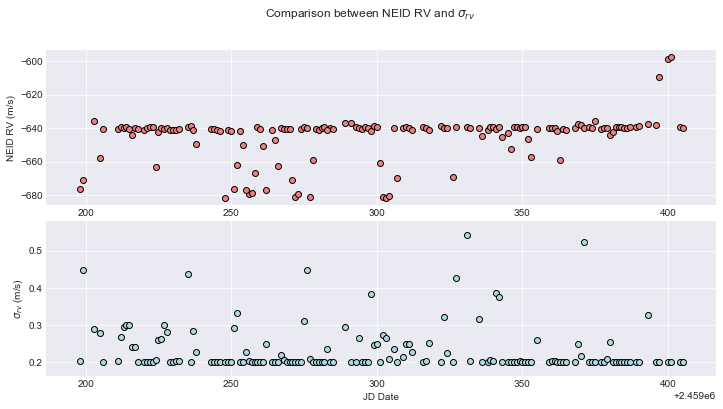

In [345]:
x = dates
y_list = [rv_sun, rv_error]
xlabel = 'JD Date'
ylabel_list = ['NEID RV (m/s)', '$\sigma_{rv}$ (m/s)']
title = 'Comparison between NEID RV and $\sigma_{rv}$'
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)



I don't think this removes enough of the velocity scatter.

In [346]:
sun_bound = 5
error_bound = 0.225
med_sun = np.abs(np.median(rv_sun))
med_error = np.abs(np.median(rv_error))
initial_out_sun = np.logical_and(med_sun + sun_bound > np.abs(rv_sun), np.abs(rv_sun) > med_sun - sun_bound)
initial_out_error = np.logical_and(error_bound > np.abs(rv_error), error_bound > np.abs(rv_error))
initial_outliers = np.logical_and(initial_out_sun, initial_out_error)
dates = dates[initial_outliers]
rv_sun = rv_sun[initial_outliers]
rv_error = rv_error[initial_outliers]

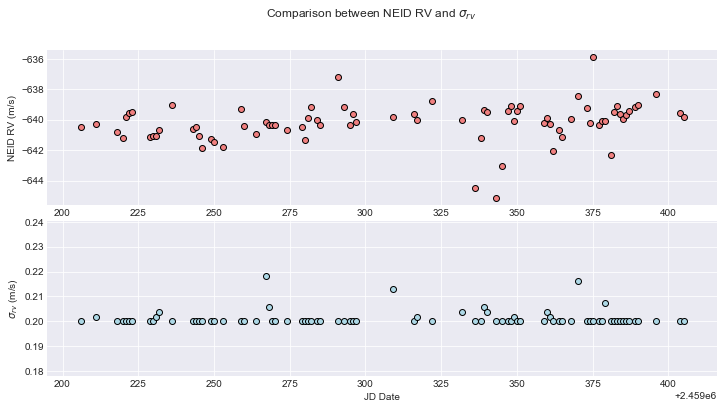

In [347]:
x = dates
y_list = [rv_sun, rv_error]
xlabel = 'JD Date'
ylabel_list = ['NEID RV (m/s)', '$\sigma_{rv}$ (m/s)']
title = 'Comparison between NEID RV and $\sigma_{rv}$'
plot.vert_comp_timeseries(x, y_list, title, xlabel, ylabel_list)

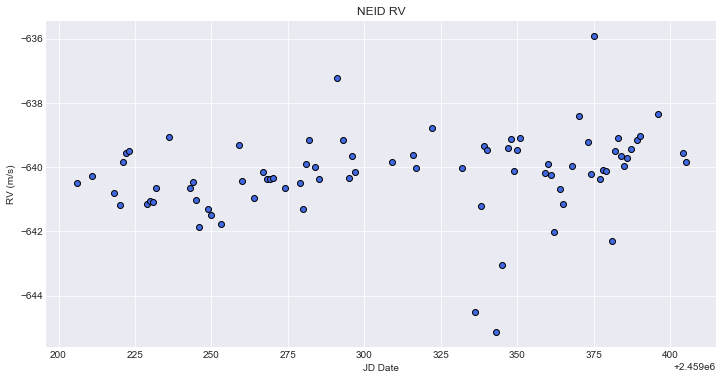

In [348]:
x = dates
y = rv_sun
title = 'NEID RV'
xlabel = 'JD Date'
ylabel = 'RV (m/s)'

plot.plot_timeseries(x, y, title, xlabel, ylabel)

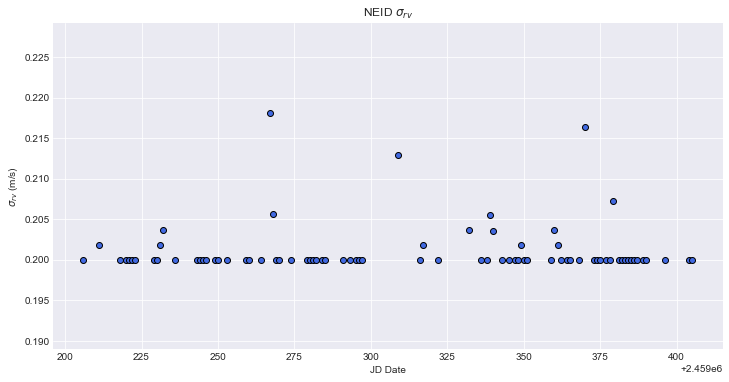

In [349]:
x = dates
y = rv_error
title = 'NEID $\sigma_{rv}$'
xlabel = 'JD Date'
ylabel = '$\sigma_{rv}$ (m/s)'

plot.plot_timeseries(x, y, title, xlabel, ylabel)

(-0.001, 0.001)

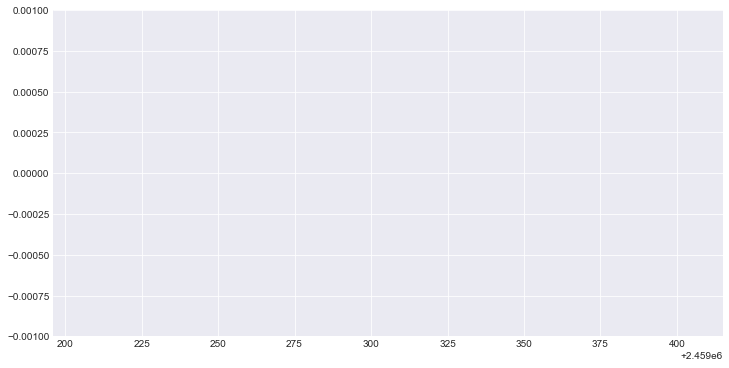

In [350]:
import matplotlib.pyplot as plt
plt.scatter(dates, rv_error)
plt.ylim([-.001, 0.001])